In [1]:
import pandas as pd
import geopandas as gpd
import os
from glob import glob

In [2]:
pattern = '/app/newdata/amenities_sii'
extension = '.shp'
shape_files = glob(os.path.join(pattern, f'*{extension}'))

In [3]:
categories = []
for file in shape_files:
    name = file.replace(pattern, '').replace(extension, '')[1:]
    categories.append(name)

In [4]:
categories

['tramites',
 'servicios',
 'minimarkets',
 'salud_especialistas',
 'deporte_pagado',
 'supermercados',
 'farmacias']

In [28]:
gdfs = []
for file in shape_files:
    gdfs.append(gpd.read_file(file))

In [29]:
gdf = gpd.GeoDataFrame(pd.concat(gdfs))
gdf = gdf[~(gdf.geometry.x<-100)]
mask = (gdf.geometry.y > -35) | (gdf.geometry.y < -38)
gdf = gdf[~mask]


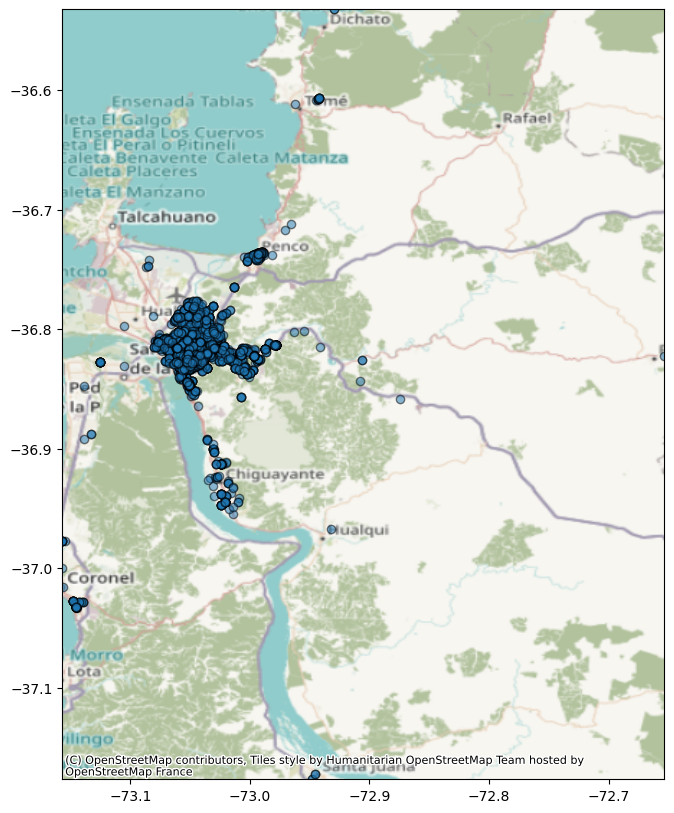

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear el GeoDataFrame
gdf.plot(ax=ax, alpha=0.5, edgecolor='k')

# Añadir mapa base de OpenStreetMap
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# Ajustar los límites del eje para que coincidan con los datos
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

# Mostrar el mapa
plt.show()


In [35]:
dict_cols = {'NOMBRE':  'name', 'ETIQUETA_2': 'category', 'SUBETIQUET': 'subcategory'}#, 'geometry': 'geo_field'}
# gdf_export = gdf[list(dict_cols.keys())].rename(columns=dict_cols)
# gdf_export = gpd.GeoDataFrame(gdf_export)
gdf_export = gdf[list(dict_cols.keys()) + ['geometry']].rename(columns=dict_cols)

In [47]:
gdf_export['name'] = gdf_export['name'].str[:99]

In [60]:
gdf_export.dropna(subset=['name'], inplace=True)

In [61]:
gdf_export.to_parquet('/app/data/amenities_sii_2024.parquet')

In [10]:
# gdf_export.to_postgis('')

In [62]:
import requests

In [31]:
from sqlalchemy import create_engine
import os

def get_db_url_from_env():
    DB_CONTAINER_NAME='clbb-db'
    POSTGRES_USER='clbb'
    POSTGRES_PASSWORD='pass123'
    POSTGRES_DB='geodb'
    return f'postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{DB_CONTAINER_NAME}:5432/{POSTGRES_DB}'

In [64]:
r = requests.get(url='http://clbb-api:8000/api/amenity')

In [66]:
pip install clbb-hermes

  Preparing metadata (setup.py) ... done
  Created wheel for clbb-hermes: filename=clbb_hermes-0.1.5.6-py3-none-any.whl size=2945 sha256=8d17a311cf371d000ec7ea0d2e37745559c5146124fc9d05b41860135c365564
  Stored in directory: /root/.cache/pip/wheels/bf/c9/6f/8ed946470476ccb1653107d386e954a3fe0eac82763b044ac9
Successfully built clbb-hermes

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
engine = create_engine(get_db_url_from_env())

In [38]:
gdf_export.to_postgis('backend_amenity', engine, if_exists='append')

InternalError: (psycopg2.errors.RaiseException) find_srid() - could not find the corresponding SRID - is the geometry registered in the GEOMETRY_COLUMNS table?  Is there an uppercase/lowercase mismatch?
CONTEXT:  PL/pgSQL function find_srid(character varying,character varying,character varying) line 17 at RAISE

[SQL: SELECT Find_SRID('public', 'backend_amenity', 'geometry');]
(Background on this error at: https://sqlalche.me/e/20/2j85)